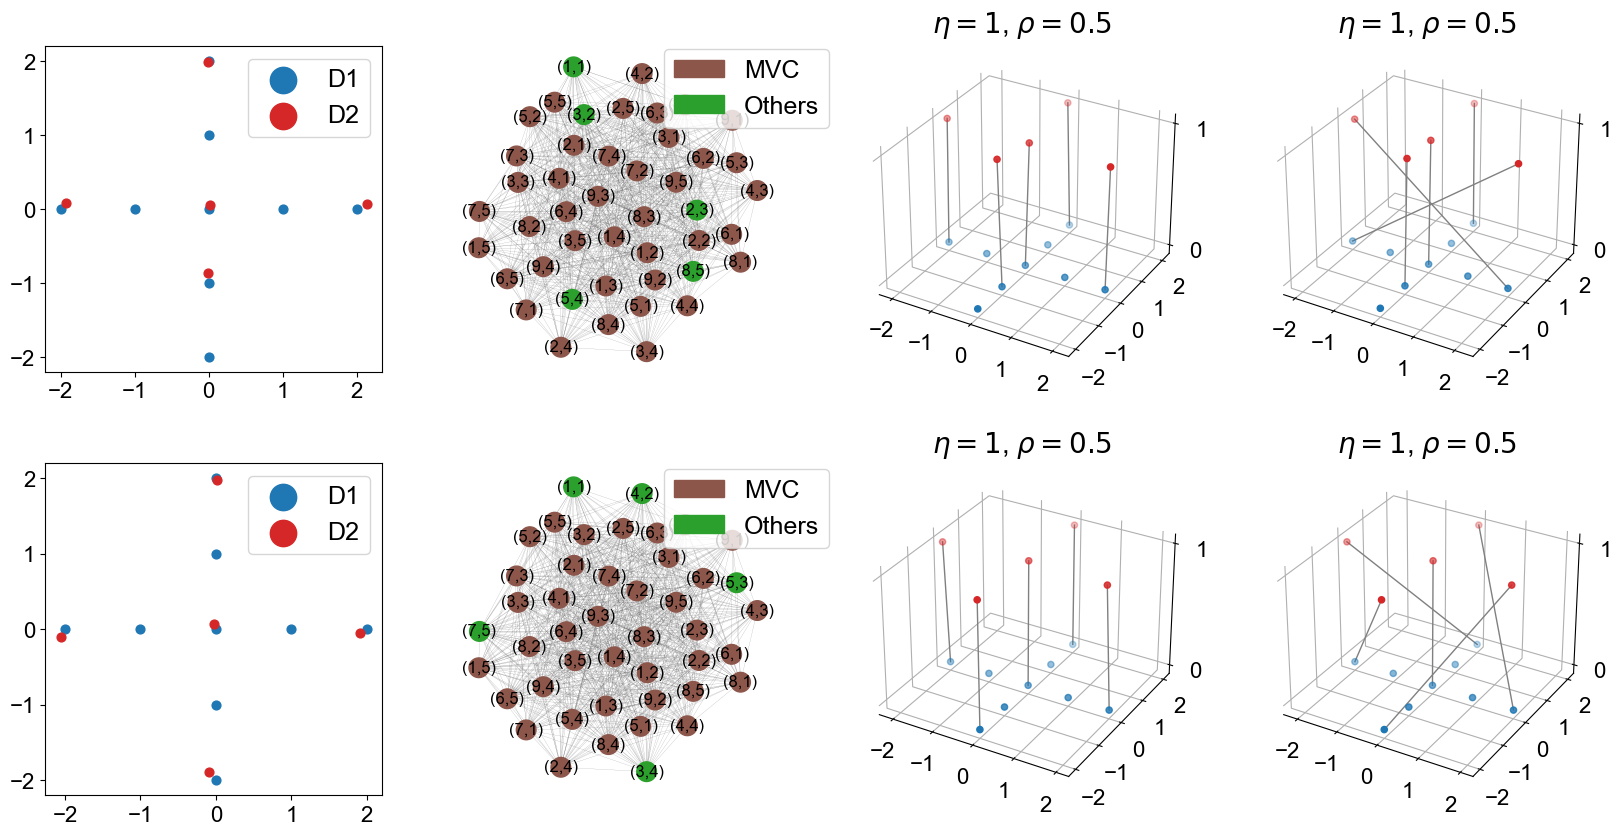

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from scipy.spatial.distance import cdist
import sgw
import networkx as nx
import matplotlib as mpl
mpl.rcParams['font.size']=20
mpl.rcParams['font.sans-serif'] = "Arial"


random_state=1321412
np.random.seed(random_state)     
mesh1 = np.array([[0, 0], [-2, 0], [2, 0], [0, 2], [0, -2],[1, 0],[-1, 0],[0, 1],[0, -1]])    
mesh2 = np.array([[0, 0, 0], [-2, 0, 0], [2, 0, 0], [0, 2, 0], [0, -1, 0]])
mesh2 = mesh2  + 3e-1 * (np.random.rand(*mesh2.shape)-0.5)  
mesh10 = np.array([[0, 0], [-2, 0], [2, 0], [0, 2], [0, -2],[1, 0],[-1, 0],[0, 1],[0, -1]])    
mesh20 = np.array([[0, 0, 0], [2, 0, 0], [-2, 0, 0], [0, 2, 0], [0, -1, 0]])
mesh20 = mesh20  + 3e-1 * (np.random.rand(*mesh20.shape)-0.5)  
random_state=1
np.random.seed(random_state)
mesh3 = np.array([[0, 0], [-2, 0], [2, 0], [0, 2], [0, -2],[1, 0],[-1, 0],[0, 1],[0, -1]])    
mesh4 = np.array([[0, 0, 0], [-2, 0, 0], [2, 0, 0], [0, 2, 0], [0, -2, 0]])
mesh4 = mesh4  + 3e-1 * (np.random.rand(*mesh4.shape)-0.5)  

  
    
    
fig = plt.figure(figsize=(20, 10))



ax = fig.add_subplot(241)    
ax.scatter(mesh1[:, 0], mesh1[:, 1], c='tab:blue', s=40, label='D1')
ax.scatter(mesh2[:, 0], mesh2[:, 1], c='tab:red' , s=40, label='D2')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.axis('equal')
ax.set_aspect('equal', adjustable='box')
ax.set_yticks([-2,-1,0,1,2])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=18, markerscale=3)





matrix = np.loadtxt('toy_unbalancedMVC_G.txt')
ones_indices = np.argwhere(matrix == 1) + [1,1]
tuple_set = np.loadtxt('toy_unbalancedMVC_set.txt')
tuple_set_int = tuple_set.astype(int)
G = nx.Graph()
G.add_nodes_from(range(1, 46))
G.add_edges_from(ones_indices)
tuple_set_int_set = set(tuple_set_int)
node_colors = ['tab:brown' if node in tuple_set_int_set else 'tab:green' for node in G.nodes()]
new_labels = ['(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)',
              '(2,1)', '(2,2)', '(2,3)', '(2,4)', '(2,5)',
              '(3,1)', '(3,2)', '(3,3)', '(3,4)', '(3,5)',
              '(4,1)', '(4,2)', '(4,3)', '(4,4)', '(4,5)',
              '(5,1)', '(5,2)', '(5,3)', '(5,4)', '(5,5)',
              '(6,1)', '(6,2)', '(6,3)', '(6,4)', '(6,5)',
              '(7,1)', '(7,2)', '(7,3)', '(7,4)', '(7,5)',
              '(8,1)', '(8,2)', '(8,3)', '(8,4)', '(8,5)',
              '(9,1)', '(9,2)', '(9,3)', '(9,4)', '(9,5)']
label_mapping = {i: new_labels[i - 1] for i in range(1, 46)}
H = nx.relabel_nodes(G,label_mapping)
pos_unbalanced = nx.spring_layout(H,seed=42) 
ax2 = fig.add_subplot(242)  
nx.draw(H, pos=pos_unbalanced, with_labels=True, node_color=node_colors, edge_color='dimgrey', width = 0.1, node_size=200)
red_patch = mpatches.Patch(color='tab:brown', label='MVC')
blue_patch = mpatches.Patch(color='tab:green', label='Others')
plt.legend(handles=[red_patch, blue_patch],fontsize=18,loc='upper left', bbox_to_anchor=(0.6, 1.0))
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylim(-1.2, 1.2)
ax2.axis('equal')
ax2.set_aspect('equal', adjustable='box')




P = np.loadtxt('toy_unbalancedP_01.csv', delimiter=',')
ax = fig.add_subplot(243, projection='3d')
ax.scatter(mesh10[:, 0], mesh10[:, 1], np.zeros(mesh1.shape[0]), c='tab:blue', s=20)
ax.scatter(mesh20[:, 0], mesh20[:, 1], np.ones(mesh2.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=1$, $\rho=0.5$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([mesh10[j, 0], mesh20[i, 0]], [mesh10[j, 1], mesh20[i, 1]], [0, 1], c='gray', linewidth=1)
  





P = np.loadtxt('toy_unbalancedP_02.csv', delimiter=',')
ax = fig.add_subplot(244, projection='3d')
ax.scatter(mesh1[:, 0], mesh1[:, 1], np.zeros(mesh1.shape[0]), c='tab:blue', s=20)
ax.scatter(mesh2[:, 0], mesh2[:, 1], np.ones(mesh2.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=1$, $\rho=0.5$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([mesh1[j, 0], mesh2[i, 0]], [mesh1[j, 1], mesh2[i, 1]], [0, 1], c='gray', linewidth=1)


    
    
    

ax = fig.add_subplot(245)    
ax.scatter(mesh3[:, 0], mesh3[:, 1], c='tab:blue', s=40, label='D1')
ax.scatter(mesh4[:, 0], mesh4[:, 1], c='tab:red' , s=40, label='D2')
ax.set_xlim(-2.2, 2.2)
ax.set_ylim(-2.2, 2.2)
ax.axis('equal')
ax.set_aspect('equal', adjustable='box')
ax.set_yticks([-2,-1,0,1,2])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.legend(fontsize=18, markerscale=3)





matrix = np.loadtxt('toy_balancedMVC_G.txt')
ones_indices = np.argwhere(matrix == 1) + [1,1]
tuple_set = np.loadtxt('toy_balancedMVC_set.txt')
tuple_set_int = tuple_set.astype(int)
G = nx.Graph()
G.add_nodes_from(range(1, 46))
G.add_edges_from(ones_indices)
tuple_set_int_set = set(tuple_set_int)
node_colors = ['tab:brown' if node in tuple_set_int_set else 'tab:green' for node in G.nodes()]
# pos_unbalanced = nx.spring_layout(G,seed=42) 
new_labels = ['(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)',
              '(2,1)', '(2,2)', '(2,3)', '(2,4)', '(2,5)',
              '(3,1)', '(3,2)', '(3,3)', '(3,4)', '(3,5)',
              '(4,1)', '(4,2)', '(4,3)', '(4,4)', '(4,5)',
              '(5,1)', '(5,2)', '(5,3)', '(5,4)', '(5,5)',
              '(6,1)', '(6,2)', '(6,3)', '(6,4)', '(6,5)',
              '(7,1)', '(7,2)', '(7,3)', '(7,4)', '(7,5)',
              '(8,1)', '(8,2)', '(8,3)', '(8,4)', '(8,5)',
              '(9,1)', '(9,2)', '(9,3)', '(9,4)', '(9,5)']
label_mapping = {i: new_labels[i - 1] for i in range(1, 46)}
H = nx.relabel_nodes(G,label_mapping)
ax2 = fig.add_subplot(246) 
nx.draw(H, pos=pos_unbalanced, with_labels=True, node_color=node_colors, edge_color='dimgrey', width = 0.1, node_size=200)
red_patch = mpatches.Patch(color='tab:brown', label='MVC')
blue_patch = mpatches.Patch(color='tab:green', label='Others')
plt.legend(handles=[red_patch, blue_patch],fontsize=18,loc='upper left', bbox_to_anchor=(0.60, 1.0))
ax2.set_xlim(-1.2, 1.2)
ax2.set_ylim(-1.2, 1.2)
ax2.axis('equal')
ax2.set_aspect('equal', adjustable='box')




P = np.loadtxt('toy_balancedP_01.csv', delimiter=',')
ax = fig.add_subplot(247, projection='3d')
ax.scatter(mesh3[:, 0], mesh3[:, 1], np.zeros(mesh1.shape[0]), c='tab:blue', s=20)
ax.scatter(mesh4[:, 0], mesh4[:, 1], np.ones(mesh2.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=1$, $\rho=0.5$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([mesh3[j, 0], mesh4[i, 0]], [mesh3[j, 1], mesh4[i, 1]], [0, 1], c='gray', linewidth=1)
    
    
    
    
    
    
    
    
    
P = np.loadtxt('toy_balancedP_02.csv', delimiter=',')
ax = fig.add_subplot(248, projection='3d')
ax.scatter(mesh3[:, 0], mesh3[:, 1], np.zeros(mesh1.shape[0]), c='tab:blue', s=20)
ax.scatter(mesh4[:, 0], mesh4[:, 1], np.ones(mesh2.shape[0]), c='tab:red', s=20)
ax.set_title(r'$\eta=1$, $\rho=0.5$',fontsize=20)
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_zticks([0, 1])
ax.tick_params(axis='both', which='major', labelsize=16)
for i in range(P.shape[1]):
    if P[:, i].sum() < 1e-10: continue
    j = np.argmax(P[:, i])
    ax.plot3D([mesh3[j, 0], mesh4[i, 0]], [mesh3[j, 1], mesh4[i, 1]], [0, 1], c='gray', linewidth=1)      
    
    
    
    
    
    

plt.savefig('mvc_1117.png')

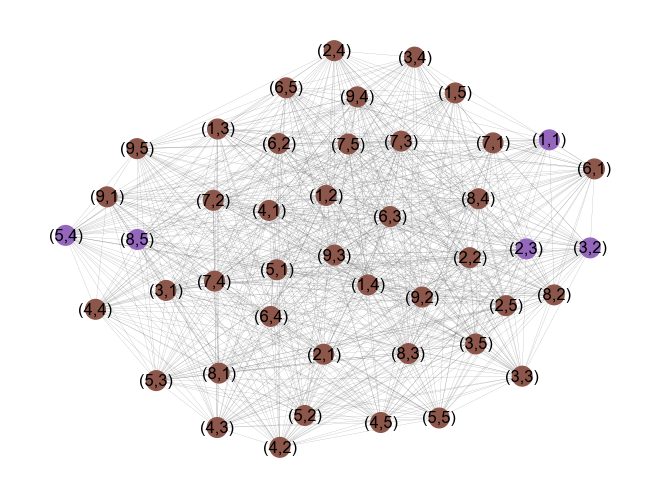

In [2]:
matrix = np.loadtxt('toy_unbalancedMVC_G.txt')
ones_indices = np.argwhere(matrix == 1) + [1,1]
tuple_set = np.loadtxt('toy_unbalancedMVC_set.txt')
tuple_set_int = tuple_set.astype(int)

G = nx.Graph()
G.add_nodes_from(range(1, 46))
G.add_edges_from(ones_indices)

tuple_set_int_set = set(tuple_set_int)
node_colors = ['tab:brown' if node in tuple_set_int_set else 'tab:purple' for node in G.nodes()]

pos_unbalanced = nx.spring_layout(G,seed=42) 

new_labels = ['(1,1)', '(1,2)', '(1,3)', '(1,4)', '(1,5)',
              '(2,1)', '(2,2)', '(2,3)', '(2,4)', '(2,5)',
              '(3,1)', '(3,2)', '(3,3)', '(3,4)', '(3,5)',
              '(4,1)', '(4,2)', '(4,3)', '(4,4)', '(4,5)',
              '(5,1)', '(5,2)', '(5,3)', '(5,4)', '(5,5)',
              '(6,1)', '(6,2)', '(6,3)', '(6,4)', '(6,5)',
              '(7,1)', '(7,2)', '(7,3)', '(7,4)', '(7,5)',
              '(8,1)', '(8,2)', '(8,3)', '(8,4)', '(8,5)',
              '(9,1)', '(9,2)', '(9,3)', '(9,4)', '(9,5)']

label_mapping = {i: new_labels[i - 1] for i in range(1, 46)}
H = nx.relabel_nodes(G,label_mapping)

# plt.figure(figsize=(5, 5))
nx.draw(H, with_labels=True, node_color=node_colors, edge_color='dimgrey', width = 0.1, node_size=200)
plt.show()